# Assignment 3 - Supervised Learning

## *Chang Shu*
Netid:  *cs530*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1+e^{x}}= \frac{1}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm. Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. In doing this we'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different learning rates by plotting the resulting cost as a function of iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**

**a.** 

The likelihood function of the data we wish to maximum




$$L(x) = P(Y|X) = \prod_{i=1}^{N} [f(Y = y_i | X =x_i)]_{y_{i=1}} [Y = y_i | X =x_i)]_{y_{i=0}}$$

$$= \prod_{i=1}^{N} [\dfrac{1}{1+e^{-w^Tx_i}}]_{y_{i=1}} \: [1 - \dfrac{1}{1+e^{-w^Tx_i}}]_{y_{i=0}}$$

$$= \prod_{i=1}^{N} (\dfrac{1}{1+e^{-w^Tx_i}})^{y_i} \: (\dfrac{e^{-w^Tx_i}}{1+e^{-w^Tx_i}})^{1-y_i}$$

**b.** 

Log the likelihood function and express it as a cost function of parameter $C(\mathbf{w})$

$$
    C(\mathbf{w}) = -ln(L(\mathbf{w})) 
                   = \sum_i \left(ln(1+e^{\mathbf{w}^T\mathbf{x}_i}) - y_i(\mathbf{w}^T\mathbf{x}_i) \right)
$$


**c.**

$
\begin{aligned}
\frac{\partial C}{\partial w_0} &= \sum_i \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1+e^{\mathbf{w}^T\mathbf{x}_i}} - \sum_{i} y_i \\  
\frac{\partial C}{\partial w_1} &= \sum_i \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1+e^{\mathbf{w}^T\mathbf{x}_i}} x_{i,1} - \sum_{i} x_{i,1}y_i \\
\frac{\partial C}{\partial w_2} &= \sum_i \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1+e^{\mathbf{w}^T\mathbf{x}_i}} x_{i,2} - \sum_{i} x_{i,2}y_i
\end{aligned} \\
$


$$\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\begin{array}{c} \frac{\partial C}{\partial w_0} \\ \frac{\partial C}{\partial w_1} \\ \frac{\partial C}{\partial w_2}\end{array}\right]^T = \left[\begin{array}{c}
\sum_i \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1+e^{\mathbf{w}^T\mathbf{x}_i}} - \sum_i y_i \\ 
\sum_i \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1+e^{\mathbf{w}^T\mathbf{x}_i}} x_{i,1} - \sum_i x_{i,1}y_i \\
\sum_i \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1+e^{\mathbf{w}^T\mathbf{x}_i}} x_{i,2} - \sum_i x_{i,2}y_i
\end{array}\right]^T$$

**d.**



$$
\left[\begin{array}{c} w_{t+1,0}\\w_{t+1,1}\\w_{t+1,2} \end{array}\right]^T = \left[\begin{array}{c} w_{t,0}\\w_{t,1}\\w_{t,2} \end{array}\right]^T - \eta\,\left[\begin{array}{c}
\sum_i \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1+e^{\mathbf{w}^T\mathbf{x}_i}} - \sum_{i} y_i \\
\sum_i \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1+e^{\mathbf{w}^T\mathbf{x}_i}} x_{i,1} - \sum_i x_{i,1}y_i \\
\sum_i \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1+e^{\mathbf{w}^T\mathbf{x}_i}} x_{i,2} - \sum_i x_{i,2}y_i
\end{array}\right]^T
$$

**e.**
(e) Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

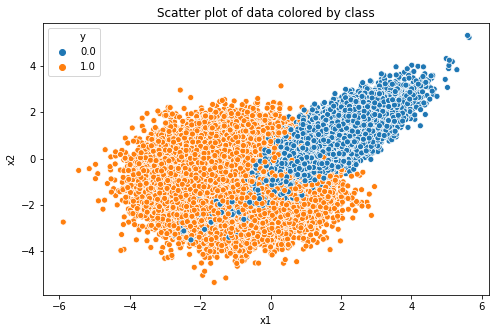

In [60]:
%matplotlib inline
import matplotlib

data = pd.read_csv('data/A3_Q1_data.csv')

fig = plt.figure(figsize=(8,5))
plot = sns.scatterplot(x="x1", y="x2",hue="y", data = data)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot of data colored by class')
plt.legend()
plt.show()

From the scatterplot above we could find that a large proportion of data points from 2 classes are overlapped. So it is not that easy to seperate.

**f.**
(f) Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

In [61]:
print('Number of missing value of each feature\n', data.isnull().sum())
print('\n\nData Summary\n', data.describe())

Number of missing value of each feature
 x1    0
x2    0
y     0
dtype: int64


Data Summary
                   x1             x2              y
count  100000.000000  100000.000000  100000.000000
mean        0.048529      -0.397106       0.500000
std         1.452409       1.164015       0.500003
min        -5.886436      -5.352265       0.000000
25%        -1.041007      -1.206343       0.000000
50%         0.039551      -0.401099       0.500000
75%         1.143536       0.402899       1.000000
max         5.634476       5.317718       1.000000


We could tell that there are not any missing values for each feature, so we do not need to impute or manipulate missing data. As for data scale, scales for x1 and x2 are quite similar, so we do not need to deal with scale differences either.

**g.**
Create a function or class to implement your logistic regression. It should take as inputs the model parameters,  𝐰=[𝑤0,𝑤1,𝑤2] , and output the class confidence probabilities,  𝑃(𝑌=𝑦𝑖|𝑋=𝑥𝑖) .

In [62]:
def sigmoid(w,x):
    w_np = np.array(w)
    x_np = np.array(x)
    n = x_np.shape[0]
    x_final = np.c_[np.ones((n,1)),x_np]
    exp = np.exp(np.dot(x_final,w.T))
    return (exp/1+exp)

**h.**

Create a function that computes the cost function  𝐶(𝐰)  for a given dataset and corresponding class labels.

In [93]:
def cost_function(w,x,y):
    w_np = np.array(w)
    x_np = np.array(x)
    y_np = np.array(y).reshape(1,-1)
    n = x_np.shape[0]
    x_final = np.c_[np.ones((n,1)),x]
    exp = np.exp(np.dot(x_final,w)) 
    xw = np.dot(x_final,w)
    cf = (np.sum(np.log(1+exp)-y_np*(np.dot(x_final,w_np))))/x.shape[0]
    print('x_final', x_final.shape)
    print('w_np', w_np.shape)
    print('exp', exp.shape)
    print('xw.shape', xw.shape)
    print('cf',cf.shape)
    #return  (np.sum(np.log(1+exp)-(xw.T*y_np).T))/x.shape[0]
    return cf

In [94]:
#test cost_function
cost_function([0.2,0.2,0.2],data.iloc[:,0:2],data.iloc[:,2])

x_final (100000, 3)
w (3,)
exp (100000,)
xw.shape (100000,)
cf ()


0.8875264466310434

**i.** **j.**


In [48]:
#split the training data and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['x1','x2']], data['y'], test_size=0.3, random_state=0)

In [49]:
# create gradient function which return partial derivatives 
#of the cost function with respect to each of the parameters
def gradient_decent(w,x,y):
    w_np = np.array(w)
    x_np = np.array(x)
    y_np = np.array(y)
    n = x_np.shape[0]
    x_final = np.c_[np.ones((n,1)),x]
    exp = np.exp(-np.dot(x_final,w))
    g0 = (np.sum(1/(1+exp)) - np.sum(y))/n
    g1 = (np.sum((1/(1+exp))*x_final[:,1]) - np.sum(x_final[:,1]*y))/n
    g2 = (np.sum((1/(1+exp))*x_final[:,2]) - np.sum(x_final[:,2]*y))/n
    return np.array([g0,g1,g2])

In [50]:
#test gradient_decent function
w=np.array([1,2,3])
data = np.array(data)
gradient_decent(w,data[:,0:2],data[:,2])

array([-0.03616874,  1.04057451,  0.72647811])

In [51]:
#create the learning function to find parameters which make changes of cost function less that 1e-6

def best_parameter(eta,x_train,y_train):
    
    #initialize weight vector to random value 
    np.random.seed(45)
    wold = np.random.rand(3)
    wnew = wold
    allw = []
    allw2 = np.array([])

    
    #set initial value of count and change
    count = 0
    change = 5
    
    while change >= 1e-6:
        wold = wnew
        n_pre = np.linalg.norm(wold)
        gd0 = gradient_decent(wold,x_train,y_train)[0]
        gd1 = gradient_decent(wold,x_train,y_train)[1]
        gd2 = gradient_decent(wold,x_train,y_train)[2]
        wnew[0] = wold[0] - eta*gd0
        wnew[1] = wold[1] - eta*gd1
        wnew[2] = wold[2] - eta*gd2
        n_aft = np.linalg.norm(wnew)
        change = np.abs(n_aft - n_pre)
        count += 1
        allw.append(wnew)
        allw2 = np.r_[allw2, wnew]
        #print(wnew)
        #print(allw)
    return count, allw, allw2

In [84]:
#test best_parameter function
epoch, wa, wa2 =best_parameter(0.5,x_train,y_train)

In [85]:
epoch

335

In [86]:
wa2 = wa2.reshape(epoch,3)

In [87]:
wa2.shape

(335, 3)

In [95]:
cost_function(wa2.T,x_train,y_train)

ValueError: operands could not be broadcast together with shapes (1,70000) (70000,335) 

In [34]:
x_train.shape

(70000, 2)

In [35]:
y_train.shape

(70000,)

In [97]:
for eta in [0.1,0.2,0.4,0.6,0.8]:
    epoch, allw, allw2 = best_parameter(eta,x_train,y_train)  #return allw of that eta
    wa2 = wa2.reshape(epoch,3)
    
    for w in allw2: 
        
        
        #calculate cost_train and cost_test
        costfun_train = []
        costfun_test = []
        
        np.apply_along_axis( cost_function(allw2,x_train,y_train), axis=1, arr=mymatrix )
        costfun_train.append(cost_function(w.T,x_train,y_train))
        costfun_test.append(cost_function(w.T,x_test,y_test))
        
        #plot the graph of cost and iteration time  
    plt.plot(epoch, costfun_train, label = 'lr={} when train'.format(eta))
    plt.plot(epoch, costfun_test, label = 'lr={} when test'.format(eta))

plt.title("Cost of training and test data on different learning rates ")
plt.xlabel("Epoch")
plt.ylabel("Costs")
plt.legend()
plt.show() 

ValueError: cannot reshape array of size 1005 into shape (1398,3)

**k.**

From the plots above we could clearly found that, the bigger the learning rate, the shorter time for convergence. Bigger learning rate is computational efficient but could easily get over the minimum point. While smaller learning rate means longer learning time but could ensure not missing minimum point of cross function. Take this trade-off into consideration, I choose 0.4 as the learning rate for reminder questions.

**l.** & **O.**

Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package StratifiedKFolds may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance.

Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

In [ ]:

data = pd.read_csv('data/A3_Q1_data.csv')
X = np.c_[np.array(data.x1), np.array(data.x2)]
Y = np.array(data.y)

#create 5 folds cross validation
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X,y)

plt.figure(figsize = (10, 8))
fold = 0
for i,j in skf.split(X,Y):
    x_train_cross, x_test_cross = X[i], X[j]
    y_train_cross, y_test_cross = Y[i], Y[j]
    w = best_parameter(0.4,x_train,y_train)[1]
    y_pre = sigmoid(w,x_test_cross)
    fp, tp, thresh = roc_curve(y_test_cross, y_hat, pos_label=1)
    plt.plot(fp, tp, label='fold {}'.format(fold))
    fold+=1

#plot ROC curve of trained classifier and random guessing
plt.plot([0,1],[0,1],'--', color='gray', label='Chance')

plt.ylabel('TP')
plt.xlabel('FP')
plt.title('ROC Curves of 7-folds Cross Validation')
plt.legend()
plt.show()

print('AUC of trained classifier : {}'.format())
print('')

**M.**

Why do we use cross validation?

The purpose of using cross validation is to test the accuracy of our model on as many data as we have. Usually we will split our data into 70%/80% training data and 30%/20% test data, but in cross validation, we split data into 5-10 folds. Let's say we split into 5 folds, so we will train our model on 4 of them and test model on 1 of them. After iterate 5 times, we could test our model on all the data we have. This methods could be quite useful when we just have small dataset and want to avoid overfitting.

**N.**
Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**

**a.**

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate  𝑦=1  if the digit is a 3, and  𝑦=0  otherwise. Create your dataset by transforming your labels into a binary format.

In [ ]:
from mnist import MNIST

#load in data
mnist = MNIST(path = '/Users/wisophia/Documents/2019 spring/IDS 705/HW/assignment3/data')
train_img, train_label = mnist.load_training()
test_img, test_label = mnist.load_testing()

#change dtype to np.array
train_img = np.array(train_img)
train_label = np.array(train_label)
test_img = np.array(test_img)
test_label = np.array(test_label)

# change training labels and test labels to binary format
train_label_n = np.where(train_label == 3, 1, 0)
test_label_n = np.where(test_label == 3, 1, 0)

In [ ]:
train_img.shape

**b.**

Plot 10 examples of each class 0 and 1, from the training dataset.

In [293]:
# check number of elements in one train_img
b = np.array(train_img)
b[0].shape #784 = 28*28

(784,)

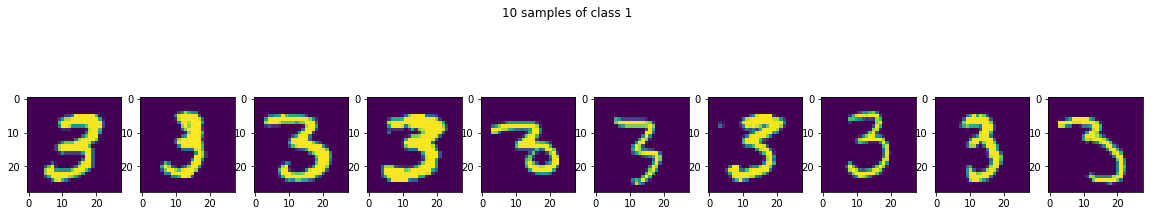

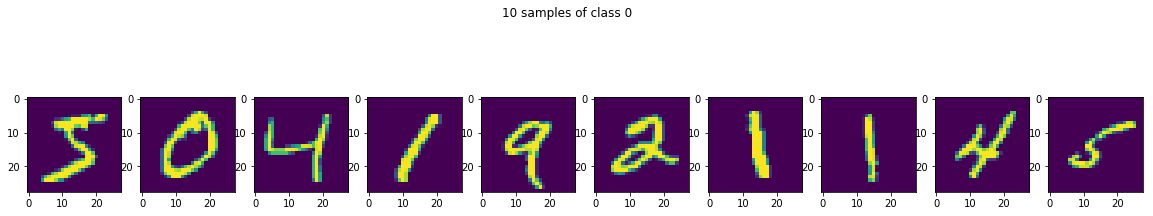

In [294]:
# select 10 samples for class 0, 1
train_img_1 = train_img[train_label_n == 1][0:10]
train_img_0 = train_img[train_label_n == 0][0:10]

fig1, axes1 = plt.subplots(1,10,figsize=(20, 4))
fig2, axes2 = plt.subplots(1,10,figsize=(20, 4))

fig1.suptitle('10 samples of class 1')
fig2.suptitle('10 samples of class 0')

for i in range(10):
    axes1[i].imshow(np.reshape(train_img_1[i],(28,28)))
    
for i in range(10):
    axes2[i].imshow(np.reshape(train_img_0[i],(28,28)))


**c.**

How many examples are present in each class? Are the classes balanced? What issues might this cause?

In [289]:
n1 = sum(train_label_n == 1)
n0 = sum(train_label_n == 0)

print('There are %f samples in class 1' % (sum(train_label_n == 1)))
print('There are %f samples in class 0' % (sum(train_label_n == 0)))
print('number of class 0 is {} times bigger than number of class 1'.format(n0/n1))

There are 6131.000000 samples in class 1
There are 53869.000000 samples in class 0
number of class 0 is 8.78633175664655 times bigger than number of class 1


Since the number of class "0" examples is close to 8.8 times as many as class "1" examples, the classes are unbalanced. In classification problem, final model will tend to predict the class which have bigger propotion. When the distribution of test data and real-life data is different from training data, it will be problematic.

**d.**

Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

In [ ]:
from sklearn.linear_model import LogisticRegression
logis_q2 = LogisticRegression()

#create 5 folds cross validation
skf_2 = StratifiedKFold(n_splits=5)


#create 5 training data and 5 test datasets
label_hat = np.zeros(train_label_n.shape)

for i,j in skf_2.split(train_img,train_label_n):
    train_img_cs, test_img_cs = train_img[i], train_img[j]
    train_label_cs, test_label_cs = train_label[i], train_label[j]
    logis_q2.fit(train_img_cs, train_label_cs)
    label_hat[j] = logis_q2.predict(test_img_cs)

In [ ]:
#plot ROC curve & AUC of logistic regression
fp_l, tp_l, thresh_l = roc_curve(train_label_n, label_hat, pos_label=1)
auc_q2_l = auc(fp_l,tp_l)
plt.plot(fp_l, tp_l, label = 'Logistic regression')
print('AUC : {}'.format(auc_q2_l))

#plot ROC curve of randomly guesses
label_r = np.random.randint(2, size = lab_train.shape[0])
fp_r, tp_r, thresh_r = roc_curve(train_label, label_r, pos_label=1)
plt.plot(fp_r, tp_r, label='Random guesses')

#plot ROC curve that all sample are not 3
label_3 = np.zeros(train_label_n.shape)
fp_3, tp_3, thresh_3 = roc_curve(train_label_n, label_3, pos_label=1)
plt.plot(fp_3, tp_3, '--', color = 'gray',label='All not 3')


plt.ylabel('TP rate')
plt.xlabel('FR rate')
plt.axis('square')
plt.title('ROC Curve')
ply.legend()
plt.show()

In [ ]:
#plot PR curves for 3 models
from sklearn.metrics import precision_recall_curve
p_q2_l,r_q2_l,t_q2_l = precision_recall_curve(train_label_n, label_hat, pos_label=1)
p_q2_r,r_q2_r,t_q2_r = precision_recall_curve(train_label_n, label_r, pos_label=1)
p_q2_3,r_q2_3,t_q2_3 = precision_recall_curve(train_label_n, label_3, pos_label=1)

plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR curve of different models')
plt.legend()
plt.show() 

print('Recall of logistic regression: {}'.format(r_q2_l[1]))
print('Precision of logistic regression: {}'.format(p_q2_l[1]))
print('Recall of randomly guessed: {}'.format(r_q2_r[1]))
print('Precision of randomly guessed: {}'.format(p_q2_r[1]))
print('Recall of all not 3: {}'.format(r_q2_3[1]))
print('Precision of all not 3: {}'.format(p_q2_2[1]))

Plots above show that, both ROC curve and PR curve of logistic regression model perform the best. I will choose to use logistic regression model in this case. 

In original dataset, ratio of 3 among all labels is 1/10. The randomly guessing will equally assign label from 0-9. So the probability of label being assigned as 3 is 1/9. And the all negative will assign all labels to be 0, so that label being assigned as 3 is 0. For this reason, this model will predict target value "1" really poorly, even worse than randomly guessing. 

**f.**

Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the LogisticRegression module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter  𝐶  is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3)  𝐹1 -score, and (4) area under the curve (AUC). Describe the implications of your findings.

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

**a.**

The dataset I used is a graduate admission dataset created by Mohan S Acharya. This dataset is inspired by the UCLA Graduate Dataset. We want to help students predict their probability to get into a specific university through using previous students' profile data. This could shorten their pathes to their dream schools and know how to customize their university life according to this perspective.

I want to use this dataset to go through the whole process of EDA, model validation and model evaluation.

**b.**

In [251]:
#import data
import pandas as pd
admission = pd.read_csv("/Users/wisophia/Documents/2019 spring/IDS 705/HW/assignment3/data/Admission_Predict_Ver1.1.csv")

In [253]:
admission['Chance of Admit '].mean()

0.7217399999999996

The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are : 
1. GRE Scores ( out of 340 ) 
2. TOEFL Scores ( out of 120 ) 
3. University Rating ( out of 5 ) 
4. "SOP: "Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
5. "LOR": How strong is Letter of Recommendation
6. "CGPA" Undergraduate GPA ( out of 10 ) 
7. "Research": Research Experience ( either 0 or 1 ) 
8. Chance of Admit ( ranging from 0 to 1 )

In [227]:
#get a glimpse of data
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [228]:
admission.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [229]:
admission.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

From above dataset summaries, we do not need preprocessing deal with missing value or scale differences, since there is no evidence of scale differences or missing value in this dataset. 

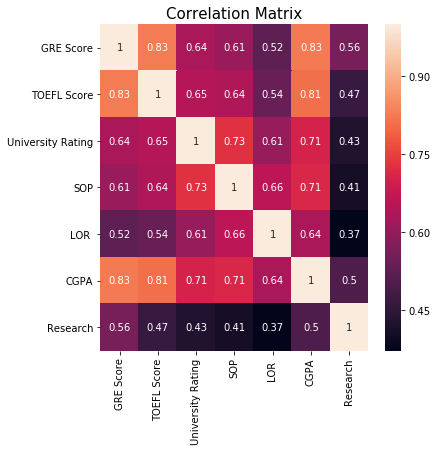

In [230]:
# check multicollinearity
import seaborn as sns
cor = admission.iloc[:,1:8].corr()
plt.figure(figsize=(6,6))
sns.heatmap(cor, annot=True, xticklabels=cor.columns, yticklabels=cor.columns)
plt.title("Correlation Matrix",fontsize =15)
plt.show()


#another way to draw correlation plot in numpy
#import numpy as np
#corr = admission.corr()
#fig, ax = plt.subplots(figsize=(8, 8))
#colormap = sns.diverging_palette(220, 10, as_cmap=True)
#dropSelf = np.zeros_like(corr)
#dropSelf[np.triu_indices_from(dropSelf)] = True
#colormap = sns.diverging_palette(220, 10, as_cmap=True)
#sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
#plt.show()

The correlation between academic scores like "GRE Score, Tofel Score and CGPA" are highly correlated, all have correlation rate higher than 0.8.

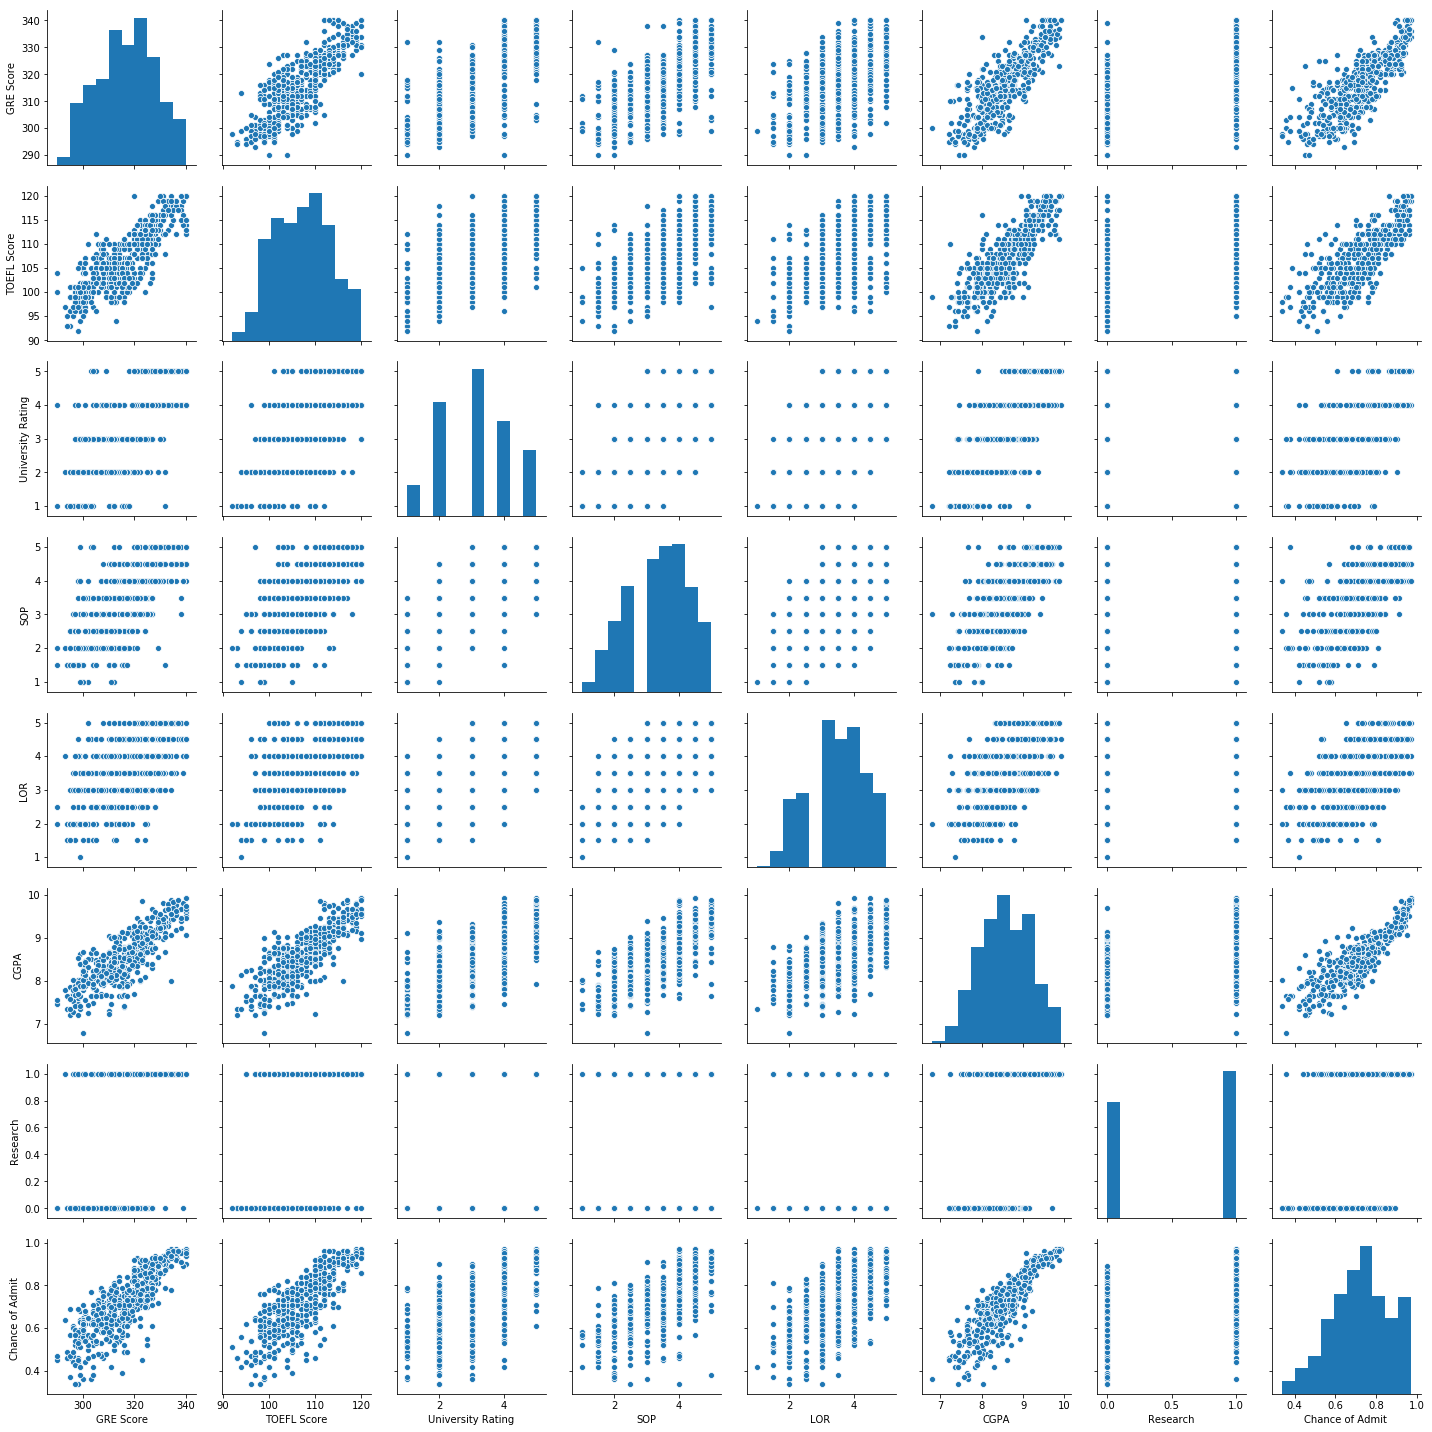

In [231]:
# Basic correlogram
sns.pairplot(admission.iloc[:,1:9])

From the pairplot above, CGPA has the strongest linear relation with chance of admit. And then, GRE score and Tofel score have obvious linear relation with CGPA either. These correspond to our correlation plot above.
Students with higher GPA in undergraduate school have high probability to have higher Tofel score and GRE score.

Text(0, 0.5, 'Chance of Admit')

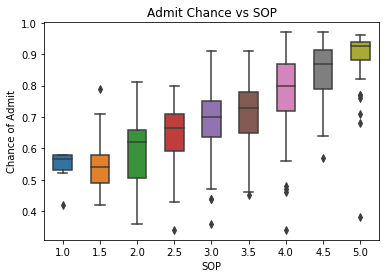

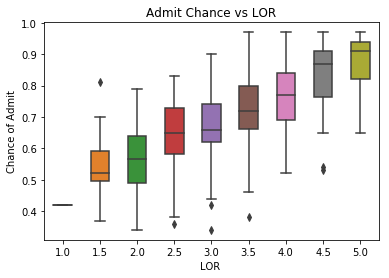

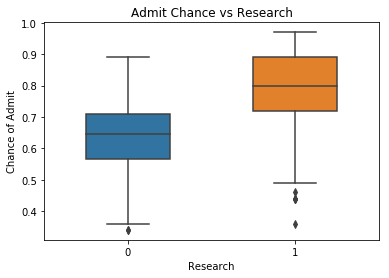

In [232]:
#plot the relationship between "SOP,LOR,CGPA,whether have research" and chance of admit
fig3=plt.figure()
axes3=sns.boxplot(x=admission['SOP'],y=admission['Chance of Admit '],width=0.5)
axes3.set_title('Admit Chance vs SOP')
axes3.set_xlabel('SOP')
axes3.set_ylabel('Chance of Admit')

fig4=plt.figure()
axes4=sns.boxplot(x=admission['LOR '],y=admission['Chance of Admit '],width=0.5)
axes4.set_title('Admit Chance vs LOR')
axes4.set_xlabel('LOR ')
axes4.set_ylabel('Chance of Admit')

fig5=plt.figure()
axes5=sns.boxplot(x=admission['Research'],y=admission['Chance of Admit '],width=0.5)
axes5.set_title('Admit Chance vs Research')
axes5.set_xlabel('Research')
axes5.set_ylabel('Chance of Admit')

From plot chart above, it show that when students have stronger recommendation letter or personal statement, they will have greater change of getting admitted by college. Besides, control other predictors the same, a student have research experiences obtain bigger opportunities to get admitted than those who do not have research experiences.

**c.**

(1)Target value/what we are trying to predict is whether or not this student will get admitted. The predictors we have are GRE Score, tofel score, university rating, sop, lor, cgpa, and research.

(2)From above dataset summaries, we do not need preprocessing deal with missing value or scale differences, since there is no evidence of scale differences or missing value in this dataset. 

(3)From the correlation plot we know that GPA, TOFEL, GRE score have over 0.8 correlation score with each other. To gain stable model, I drop TOFEL and GRE, leave GPA.

In [238]:
admission = admission.drop(['GRE Score','TOEFL Score'], axis=1)

In [239]:
admission.head()

,Serial No.,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,4,4.5,4.5,9.65,1,0.92
1,2,4,4.0,4.5,8.87,1,0.76
2,3,3,3.0,3.5,8.00,1,0.72
3,4,3,3.5,2.5,8.67,1,0.80
4,5,2,2.0,3.0,8.21,0,0.65


**d.**

I will use logistic regression since target value is binary variable. We need to do binary classification. Random forest might do good when predictors have many interactions, but from pairplots we can see that there not much evidence of interactions, so logistic regression could win at giving better prediction of probability under this circumstances. Besides, when compared with knn, knn might run faster but logistic regression, but its' prediction could be poorer. So taking all these trade-off into consideration, I choose logistic regression model.

**e.**

For logistica regression, I will choose ROC curve and PR curve for logistic regression. The best model will converge at upper left on ROC curve and upper right on PC curve. This means this model have high recall, high precision and low false positive rate.

**f.**

 We just have 500 observations in our dataset. If I split the whole dataset into one group of training data and test data, both traning data and test data will be too small. So I choose to use cross validation to make the whole dataset as test data.

In [240]:
#transfer "Chance of Admit" to 0/1 variables, so that we could predict whether a student is get admitted or not
#to make the number of 0/1 balanced, I set threshold to 0.73, thus the mean of "Chance of Admit" could be close to 0.5 
admission['binary']=admission['Chance of Admit ']
admission['binary'][admission['Chance of Admit ']>=0.73]=1
admission['binary'][admission['Chance of Admit ']<0.73]=0
admission['binary'].mean()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0.496

In [189]:
admission.shape

(500, 8)

In [241]:
admission.head()

,Serial No.,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,binary
0,1,4,4.5,4.5,9.65,1,0.92,1.0
1,2,4,4.0,4.5,8.87,1,0.76,1.0
2,3,3,3.0,3.5,8.00,1,0.72,0.0
3,4,3,3.5,2.5,8.67,1,0.80,1.0
4,5,2,2.0,3.0,8.21,0,0.65,0.0


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

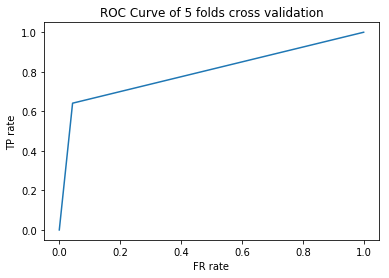

AUC : 0.7987391193036355


In [242]:
#fit training data in logistic regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()

#create 5 folds cross validation
X = admission.iloc[:,2:7]
Y = admission.iloc[:,7]

skf_3 = StratifiedKFold(n_splits=5)


y_hat = np.zeros_like(Y)

#create 5 training data and 5 test datasets
for i,j in skf_3.split(X,Y):
    x_train, x_test = X.iloc[i], X.iloc[j]
    y_train, y_test = Y[i], Y[j]
    logis.fit(x_train, y_train)
    
    #change default threshold of logistic regression model in sklearn
    threshold = 0.73
    y_hat[j] = np.where(logis.predict_proba(x_test)[:,1] > threshold, 1, 0)


#plot one ROC curve among the whole test data which exactly the same as the whole dataset
fp, tp, thresh = roc_curve(Y, y_hat, pos_label=1)
auc_q3 = auc(fp,tp)
plt.plot(fp, tp,label'ROC curve)
plt.ylabel('TP rate')
plt.xlabel('FR rate')
plt.title('ROC Curve of 5 folds cross validation')
plt.show()

print('AUC : {}'.format(auc_q3))

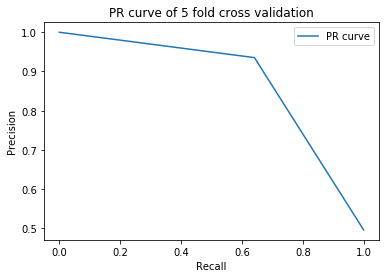

Recall : 0.6411290322580645
Precision : 0.9352941176470588


In [250]:
#plot PR curve
from sklearn.metrics import precision_recall_curve
p_q3,r_q3,t = precision_recall_curve(Y, y_hat, pos_label=1)
   
plt.plot(r_q3, p_q3, label='PR curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR curve of 5 fold cross validation')
plt.legend()
plt.show() 
print('Recall : {}'.format(r_q3[1]))
print('Precision : {}'.format(p_q3[1]))

**h.**

The performance of the logistic model is relatively good, since the AUC is close to 0.8. Since our goal is to predict who could get admitted by university, we care about Recall and "False Negative" case most. False negative case here means students who actually got admitted but be predicted as failure in admission. From the plots above, recall is close to 0.64, which means 64% of students who get actually admitted has been predicted correctly. And the precision is close to 0.94, which means 94% of students who were predicted to be success are actually being admitted by university. This model does good in precision. It could be improved to generate better recall.

One of the factor impact model performance could be the selection of threshold. In the original dataset, whether a student could get admitted is represented by their probability of getting admitted. And the mean of the dataset is close to 0.72, which means majority of the students have high probability to being admitted. To make a balanced dataset, I choose a threshold of 0.73. And during the process of fitting model, I change default threshold in sklearn logistic model from 0.5 to 0.73. This is where the ROC curve and PR curve come from. If I choose to decrease threshold in logistic regression model, I will get better ROC and PR curve. One reason why this happen might be my model tend to systemically underestimate the probablity of admit. I could improve model performance through changing threshold in spliting predictor and threshold in logistic regression process.   


**i.**

This model could help students to estimate whether they could get admitted by a specific university. This could be very useful since each year millions of students need to apply for universities around the world, and application fee could be a burden for some students. If they could know their probability to get in a university, they could save a lot of money and energy on university that they have no chance to get in. 

One take away is that, if people want to get more accurate model, it would be better to collect more balanced original dataset. And people should select threshold very carefully and take the propotion of different class into consideration.